In [1]:
import os
import glob

Load the Data

In [2]:
# path to the folder containing the images
path = 'C:\Projects\Face_Recognition\Images'

In [3]:
# get Images names stored in "Images" folder in a list 
images = []
person_names=set()
for file in glob.glob(path + "/*.jpg"):
    images.append(file)
    person_names.add(file.split('\\')[-1].split('.')[0].split(' ')[0])
person_names = list(dict.fromkeys(person_names))


In [4]:
len(images)

50

In [5]:
person_names

['Sanchez', 'Said', 'Boris', 'Tebboun', 'Macron']

In [ ]:
# download Dlib CNN face detector
!wget http://dlib.net/files/mmod_human_face_detector.dat.bz2

In [7]:
import cv2
import matplotlib.pyplot as plt
import dlib

In [8]:
# Load CNN face detector into dlib
dnnFaceDetector=dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")

In [ ]:
# path to image_crop folder
os.mkdir(path+'/Images_crop/')

In [9]:
# for each person create a seperate folder 
for person in person_names:
    os.mkdir(path+'/Images_crop/' + person+'/')

FileExistsError: [WinError 183] Impossible de créer un fichier déjà existant: 'C:\\Projects\\Face_Recognition\\Images/Images_crop/Sanchez/'

In [10]:
# detect face, crop it and save it in the corresponding folder
for file_name in images:
    img=cv2.imread(file_name)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    rects=dnnFaceDetector(gray,1)
    left, top, right, bottom = 0, 0, 0, 0
    for (i,rect) in enumerate(rects):
        left=rect.rect.left()
        top=rect.rect.top()
        right=rect.rect.right()
        bottom=rect.rect.bottom()
    width=right-left
    height=bottom-top
    img_crop=img[top:top+height,left:left+width]
    image_path=path+'/Images_crop/'+file_name.split('/')[-1].split('.')[0].split(' ')[0]+'/'+file_name.split('/')[-1]
    cv2.imwrite(image_path,img_crop) 

In [12]:
# get images names for testing and put them in a list test_image_path_names
test_image_path_names = []
for file_name in glob.glob(path + "/Images_test/*.jpg"):
    test_image_path_names.append(file_name)

In [13]:
len(test_image_path_names) # number of test images

4

In [52]:
os.mkdir(path+'/Test_Images_crop/')

In [ ]:
for person in person_names:  
    os.mkdir(path+'/Test_Images_crop/' + person+'/')

In [15]:
# Detect face, crop it and save it in the corresponding folder
for file_name in test_image_path_names:
    img=cv2.imread(file_name)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    rects=dnnFaceDetector(gray,1)
    left, top, right, bottom = 0, 0, 0, 0
    for (i,rect) in enumerate(rects):
        left=rect.rect.left()
        top=rect.rect.top()
        right=rect.rect.right()
        bottom=rect.rect.bottom()
    width=right-left
    height=bottom-top
    img_crop=img[top:top+height,left:left+width]
    image_path=path+'/Test_Images_crop/'+file_name.split('/')[-1].split('.')[0].split(' ')[0]+'/'+file_name.split('/')[-1]
    cv2.imwrite(image_path,img_crop)

Define the Model Architecture and Load the Weights

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import tensorflow.keras.backend as K

In [17]:
#Define VGG_FACE_MODEL architecture
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [18]:
# load VGG model weights
model.load_weights('vgg_face_weights.h5')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 226, 226, 3)      0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 226, 226, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                        

In [20]:
# Remove Last Softmax layer and get model upto last flatten layer with outputs 2622 units
vgg_face=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)

Train our classifier/recognizer using the face embeddings and the labels

In [21]:
# prepare training data 
x_train=[]
y_train=[]
person_folders = os.listdir(path+'/Images_crop/')
person_rep=dict()
for i,person in enumerate(person_folders):
  person_rep[i]=person
  image_names=os.listdir(path+'/Images_crop/'+person+'/')
  for image_name in image_names:
    img=load_img(path+'/Images_crop/'+person+'/'+image_name,target_size=(224,224))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)
    x_train.append(np.squeeze(K.eval(img_encode)).tolist())
    y_train.append(i)

In [22]:
person_rep

{0: 'Boris', 1: 'Macron', 2: 'Said', 3: 'Sanchez', 4: 'Tebboun'}

In [23]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [24]:
#Prepare Test Data
x_test=[]
y_test=[]
person_folders=os.listdir(path+'/Test_Images_crop/')
for i,person in enumerate(person_folders):
  image_names=os.listdir(path+'/Test_Images_crop/'+person+'/')
  for image_name in image_names:
    img=load_img(path+'/Test_Images_crop/'+person+'/'+image_name,target_size=(224,224))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)
    x_test.append(np.squeeze(K.eval(img_encode)).tolist())
    y_test.append(i)

In [25]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [26]:
# Save test and train data for later use
np.save('train_data',x_train)
np.save('train_labels',y_train)
np.save('test_data',x_test)
np.save('test_labels',y_test)

In [27]:
# Load saved data
x_train=np.load('train_data.npy')
y_train=np.load('train_labels.npy')
x_test=np.load('test_data.npy')
y_test=np.load('test_labels.npy')

In [28]:
# Softmax regressor to classify images based on encoding 
classifier_model=Sequential()
classifier_model.add(Dense(units=100,input_dim=x_train.shape[1],kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.3))
classifier_model.add(Dense(units=10,kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.2))
classifier_model.add(Dense(units=6,kernel_initializer='he_uniform'))
classifier_model.add(Activation('softmax'))
classifier_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='nadam',metrics=['accuracy'])

In [29]:
classifier_model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
2/2 [==============================] - 4s 458ms/step - loss: 1.7573 - accuracy: 0.3800 - val_loss: 2.4178 - val_accuracy: 0.1250
Epoch 2/100
2/2 [==============================] - 0s 45ms/step - loss: 0.8803 - accuracy: 0.7600 - val_loss: 2.7349 - val_accuracy: 0.1875
Epoch 3/100
2/2 [==============================] - 0s 60ms/step - loss: 0.7143 - accuracy: 0.8600 - val_loss: 2.6703 - val_accuracy: 0.1875
Epoch 4/100
2/2 [==============================] - 0s 70ms/step - loss: 0.6126 - accuracy: 0.9600 - val_loss: 2.6396 - val_accuracy: 0.1875
Epoch 5/100
2/2 [==============================] - 0s 94ms/step - loss: 0.5495 - accuracy: 0.9800 - val_loss: 2.7072 - val_accuracy: 0.1875
Epoch 6/100
2/2 [==============================] - 0s 67ms/step - loss: 0.5644 - accuracy: 0.9600 - val_loss: 2.7578 - val_accuracy: 0.1875
Epoch 7/100
2/2 [==============================] - 0s 103ms/step - loss: 0.4995 - accuracy: 0.9800 - val_loss: 2.7775 - val_accuracy: 0.1875
Epoch 8/100
2/2 [=

In [30]:
# save model for later use 
tf.keras.models.save_model(classifier_model,'classifier_model.h5')

In [31]:
# load saved model
classifier_model=tf.keras.models.load_model('classifier_model.h5')

In [32]:
# path to test image
test_image_path=path+'/Images_test/'

In [33]:
dnnFaceDetector = dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")

In [34]:
def plot(img):
  plt.figure(figsize=(8,4))
  plt.imshow(img[:,:,::-1])
  plt.show()

In [35]:
# label names for class numbers
person_rep

{0: 'Boris', 1: 'Macron', 2: 'Said', 3: 'Sanchez', 4: 'Tebboun'}

In [127]:
os.mkdir(path+'/Predictions')

FileExistsError: [WinError 183] Impossible de créer un fichier déjà existant: 'C:\\Projects\\Face_Recognition\\Images/Predictions'

1/1 [==============================] - 0s 15ms/step


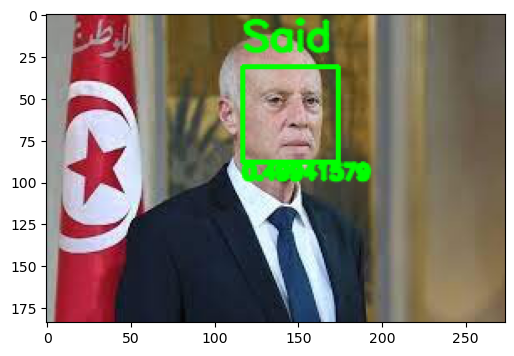

1/1 [==============================] - 0s 31ms/step


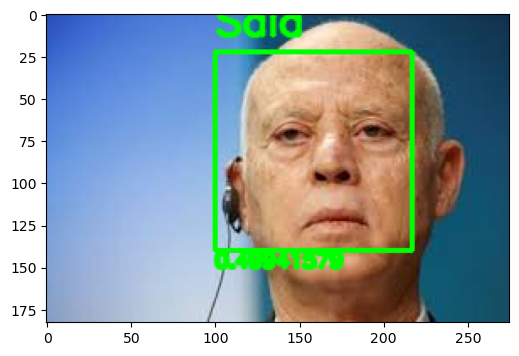

1/1 [==============================] - 0s 16ms/step


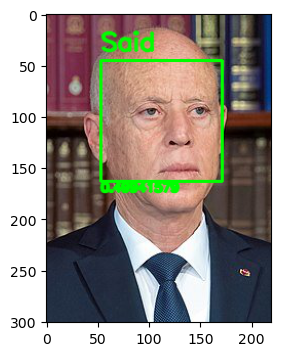

1/1 [==============================] - 0s 14ms/step


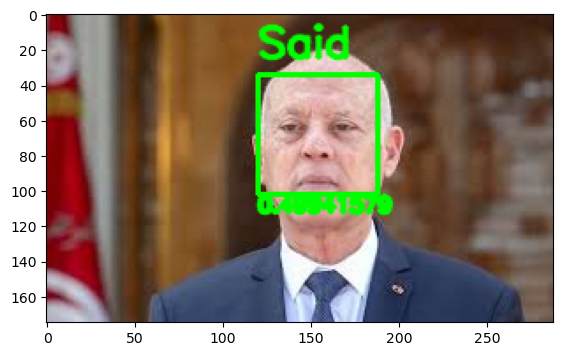

In [37]:
for img_name in os.listdir(path+'/Images_test/'):
    if img_name=='crop_img.jpg':
        continue
    img=cv2.imread(path+'/Images_test/'+img_name)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # detect faces in the image
    rects = dnnFaceDetector(gray, 1)
    left,right,top,bottom=0,0,0,0
    for (i, rect) in enumerate(rects):
        left=rect.rect.left()
        right=rect.rect.right()
        top=rect.rect.top()
        bottom=rect.rect.bottom()
        width=right-left
        height=bottom-top
        img_crop=img[top:top+height,left:left+width]
        cv2.imwrite(path+'/Images_test/crop_img.jpg',img_crop)

        # get embeddings
        crop_img=load_img(path+'/Images_test/crop_img.jpg',target_size=(224,224))
        crop_img=img_to_array(crop_img)
        crop_img=np.expand_dims(crop_img,axis=0)
        crop_img=preprocess_input(crop_img)
        crop_img_encode=vgg_face(crop_img)

        # predict class
        embed=K.eval(img_encode)
        person=classifier_model.predict(embed)
        name=person_rep[np.argmax(person)]
        os.remove(path+'/Images_test/crop_img.jpg')
        cv2.rectangle(img,(left,top),(right,bottom),(0,255,0),2)
        img=cv2.putText(img,name,(left,top-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,255,0),2,cv2.LINE_AA)
        img=cv2.putText(img,str(np.max(person)),(left,top+height+10),cv2.FONT_HERSHEY_SIMPLEX,0.4,(0,255,0),2,cv2.LINE_AA)

        # save image with bounding box and name
        cv2.imwrite(path+'/Predictions/'+img_name,img)
        plot(img)